In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-risk-assessment-dataset/Heart_Attack_Risk_Levels_Dataset.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-risk-assessment-dataset/Heart_Attack_Risk_Levels_Dataset.csv')

In [3]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor
...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,Moderate,Monitor closely and consult doctor
1315,66,1,84,125,55,149.0,1.33,0.172,positive,High,Immediate medical attention
1316,45,1,85,168,104,96.0,1.24,4.250,positive,High,Immediate medical attention
1317,54,1,58,117,68,443.0,5.80,0.359,positive,High,Immediate medical attention


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
 9   Risk_Level                1319 non-null   object 
 10  Recommendation            1319 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 113.5+ KB


In [5]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

In [6]:
df.describe(include='all')

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319,1319,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,High,Immediate medical attention
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810,812,812
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN,NaN,NaN
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN,NaN,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN,NaN,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN,NaN,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN,NaN,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN,NaN,NaN


# Vizualization Section

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result', 'Risk_Level', 'Recommendation'],
      dtype='object')

In [9]:
cols = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result', 'Risk_Level', 'Recommendation']

# Histogram plot

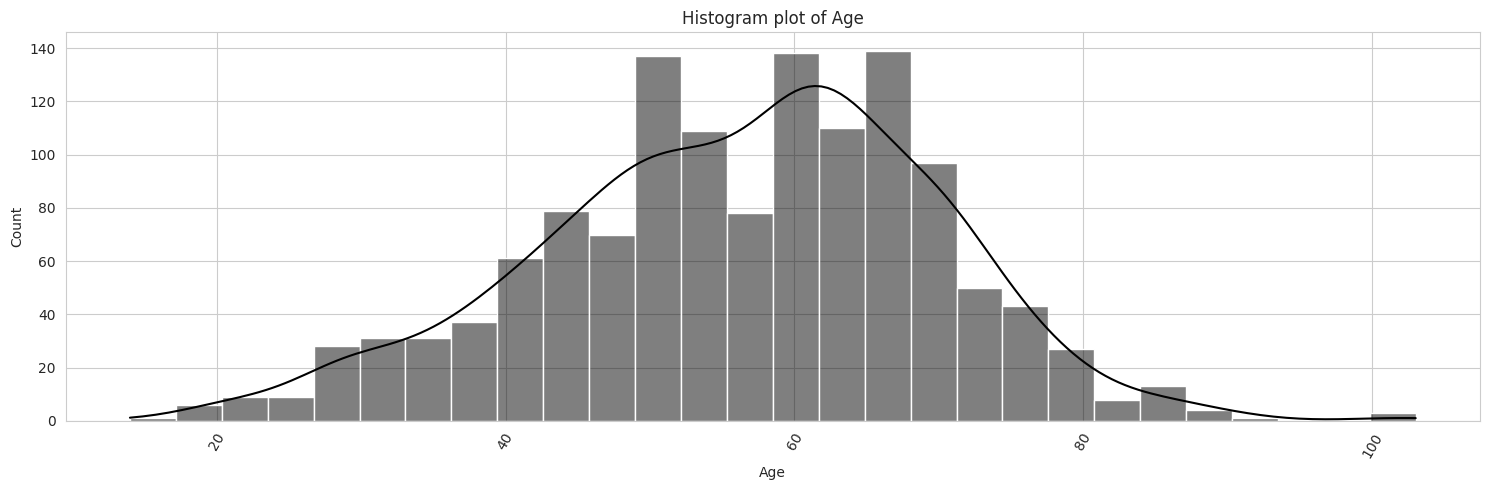

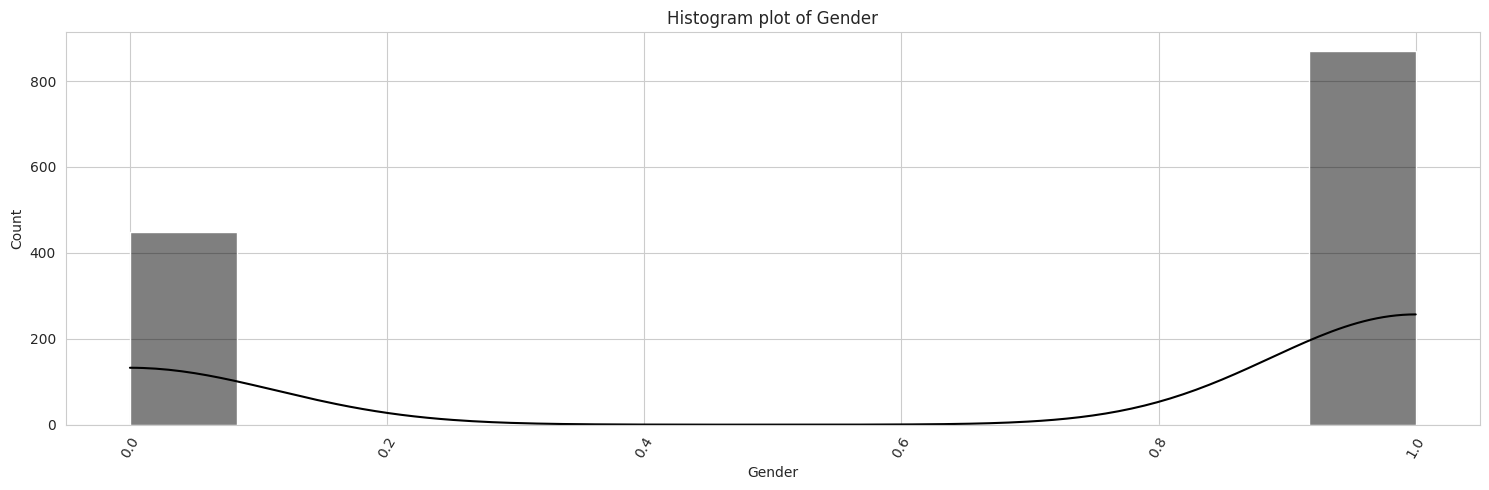

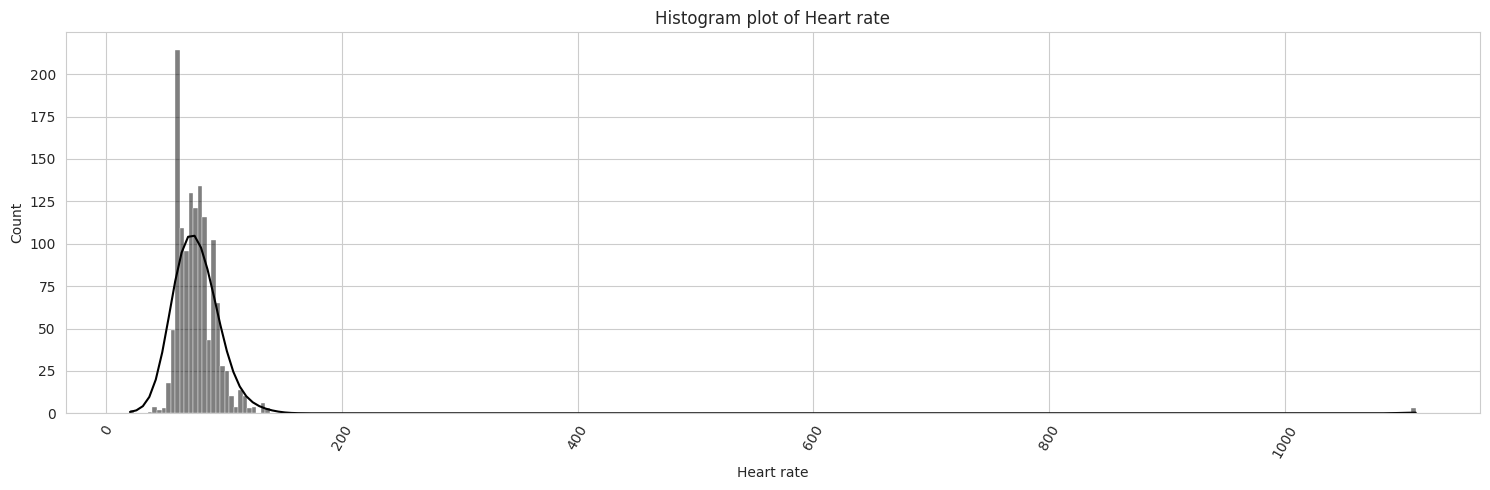

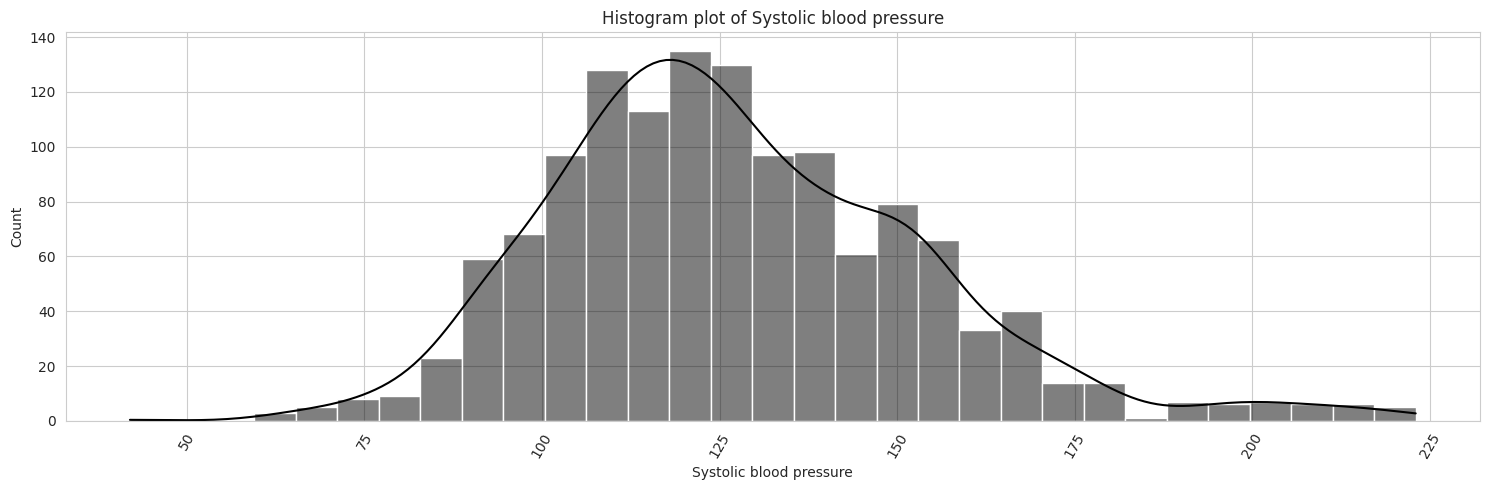

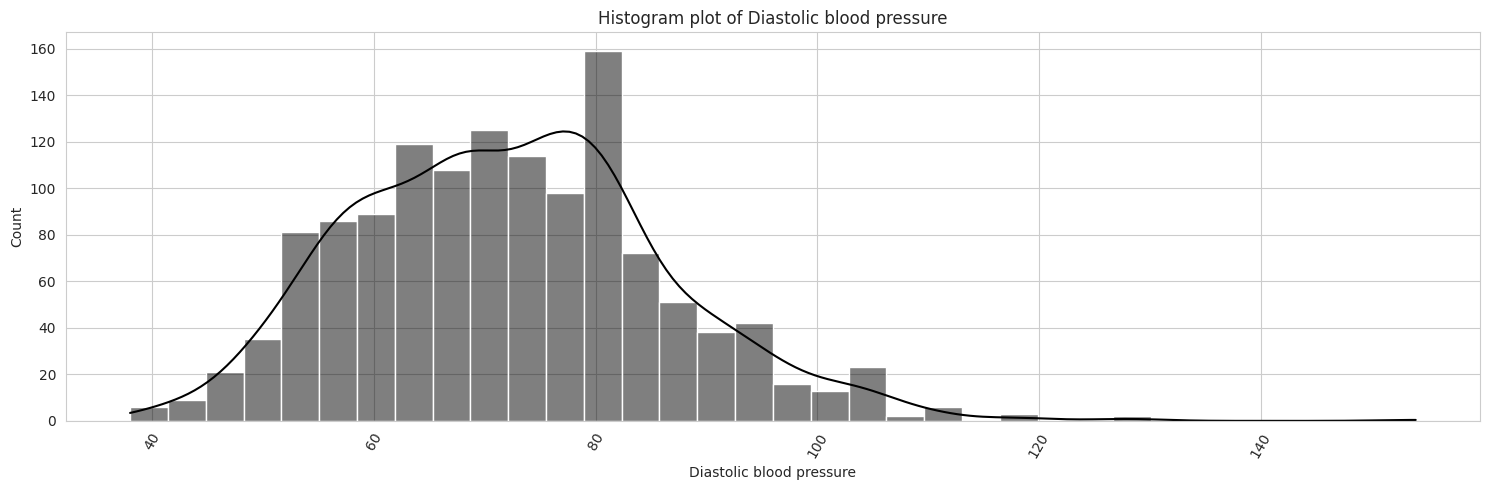

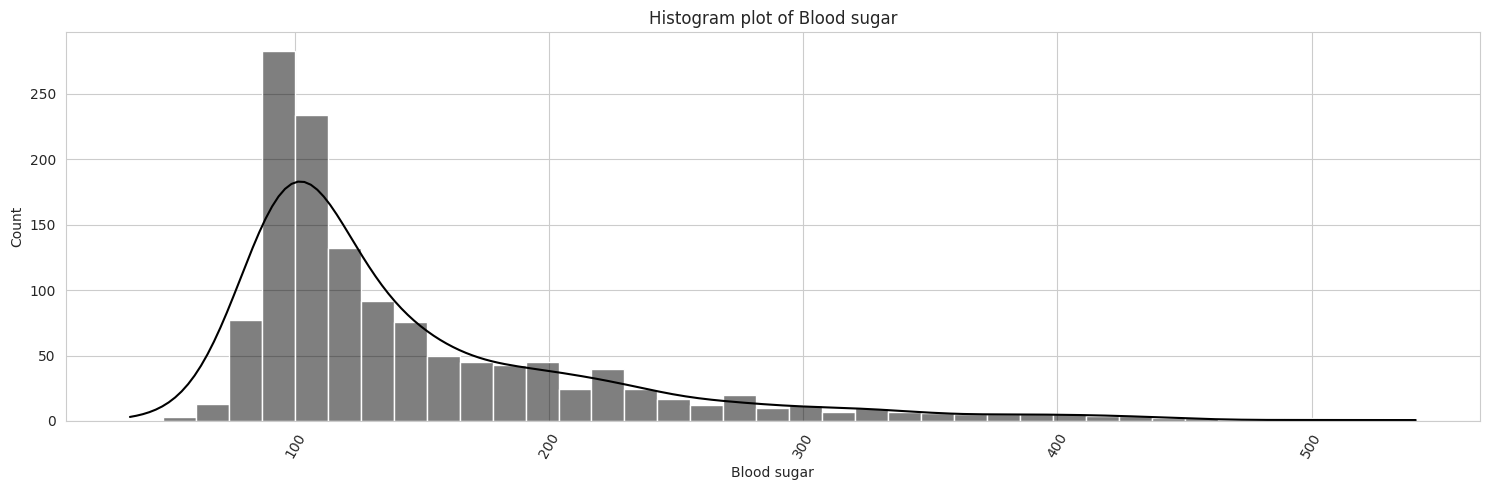

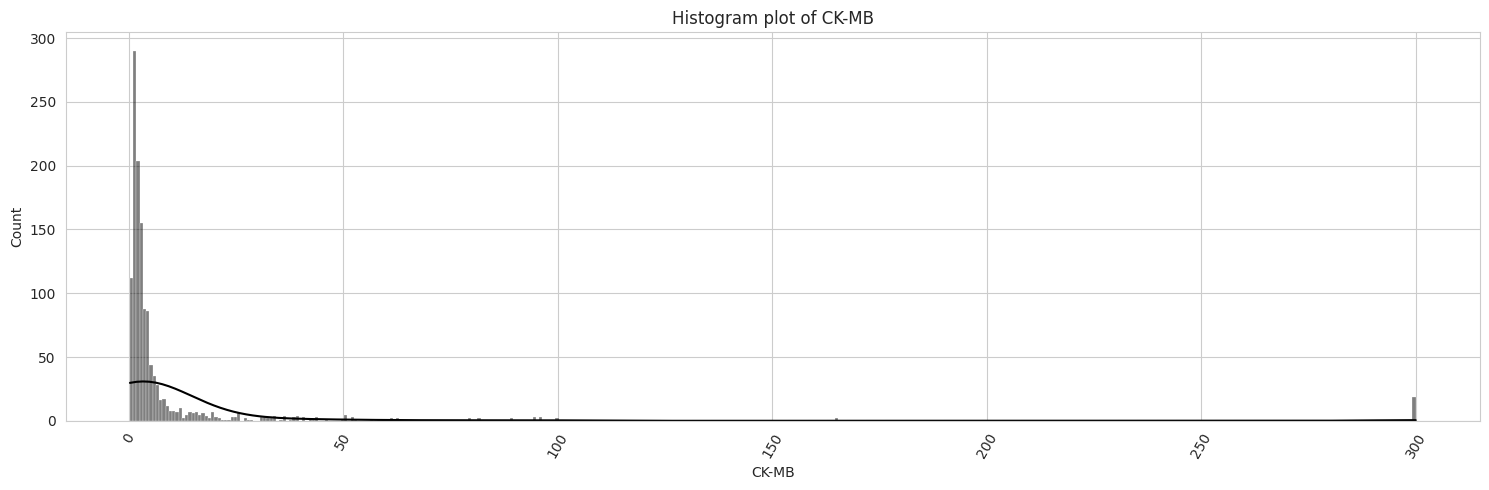

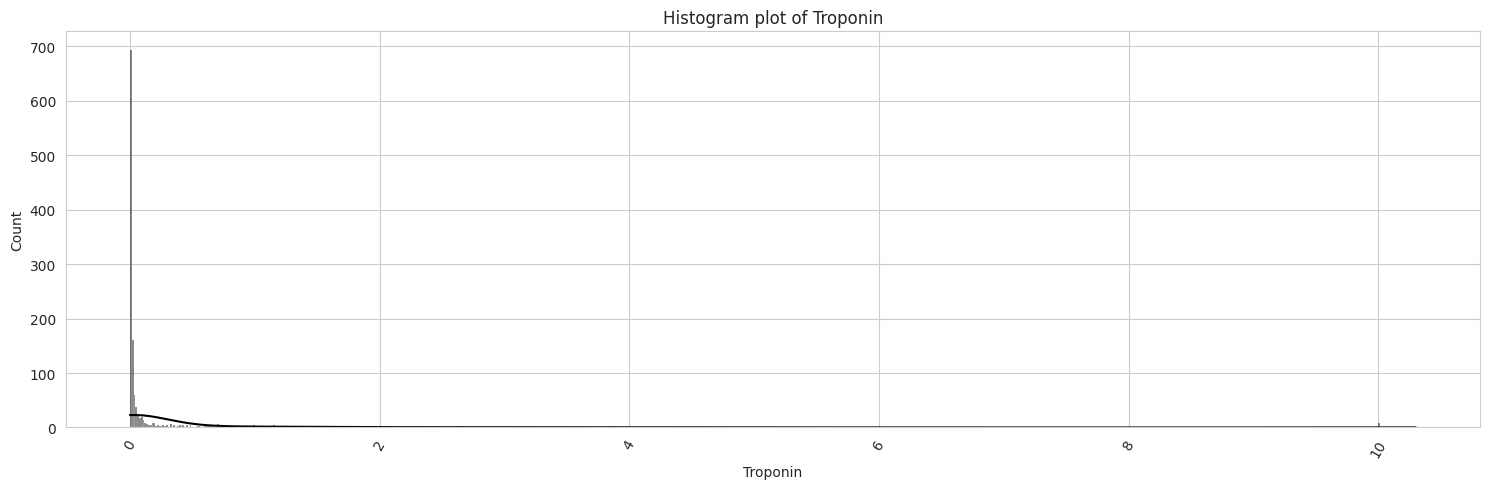

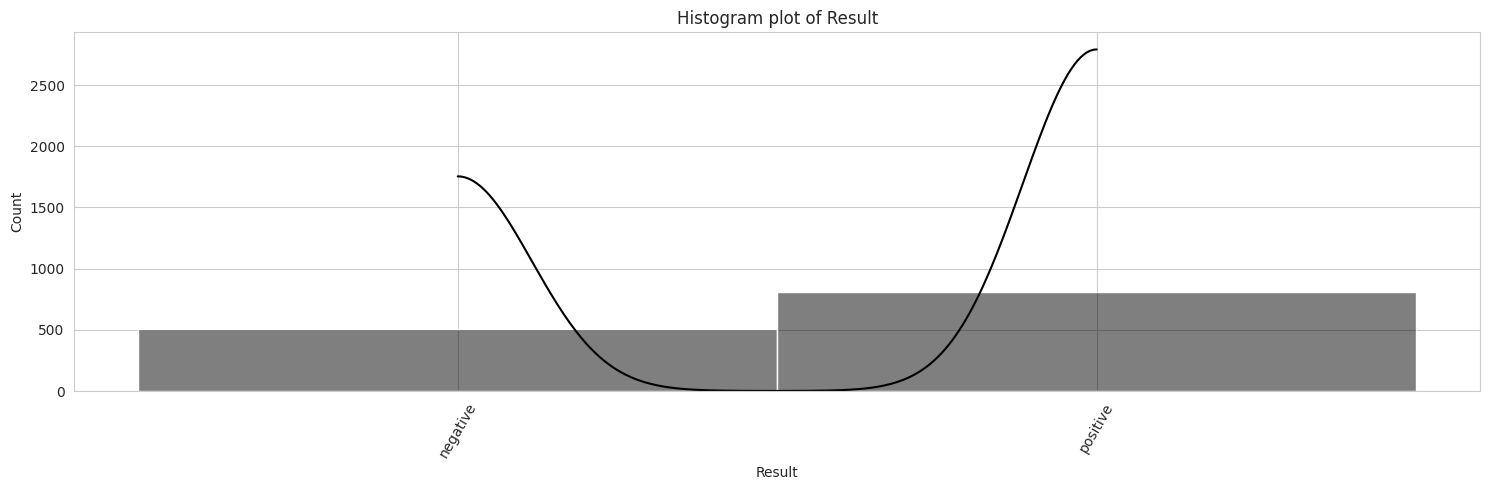

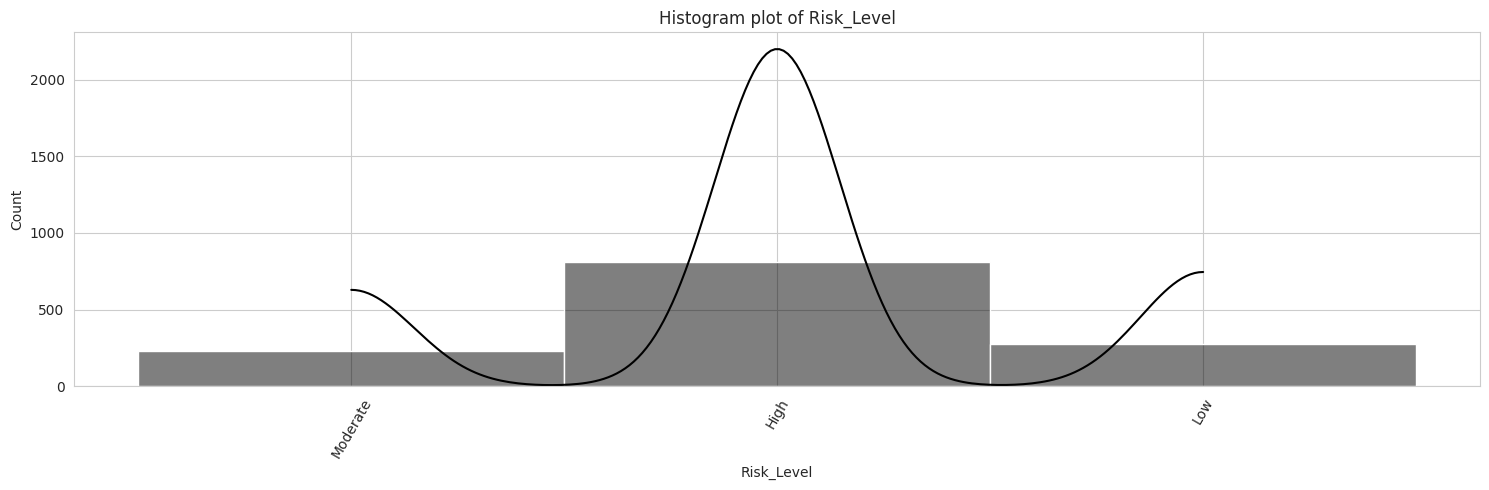

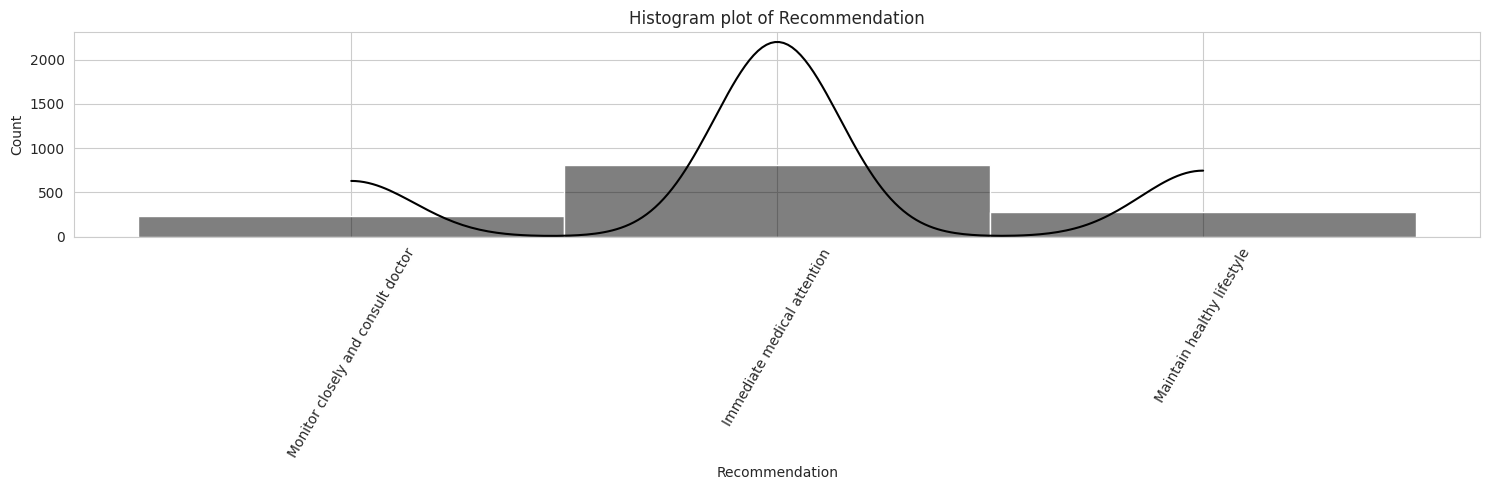

In [10]:
sns.set_style('whitegrid')

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[features].dropna(),kde=True,color='black')
        plt.title(f'Histogram plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

# Count plot

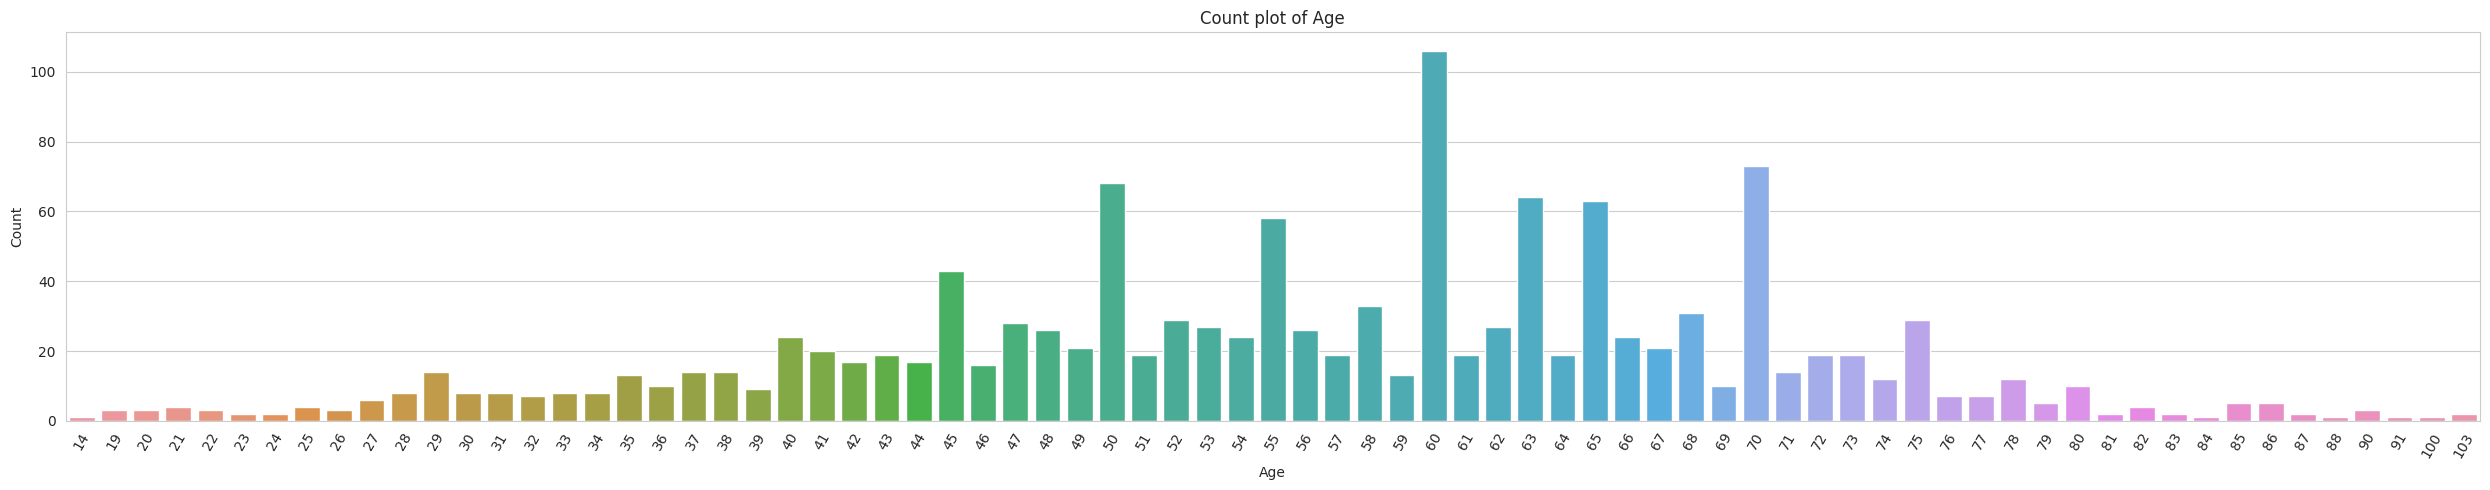

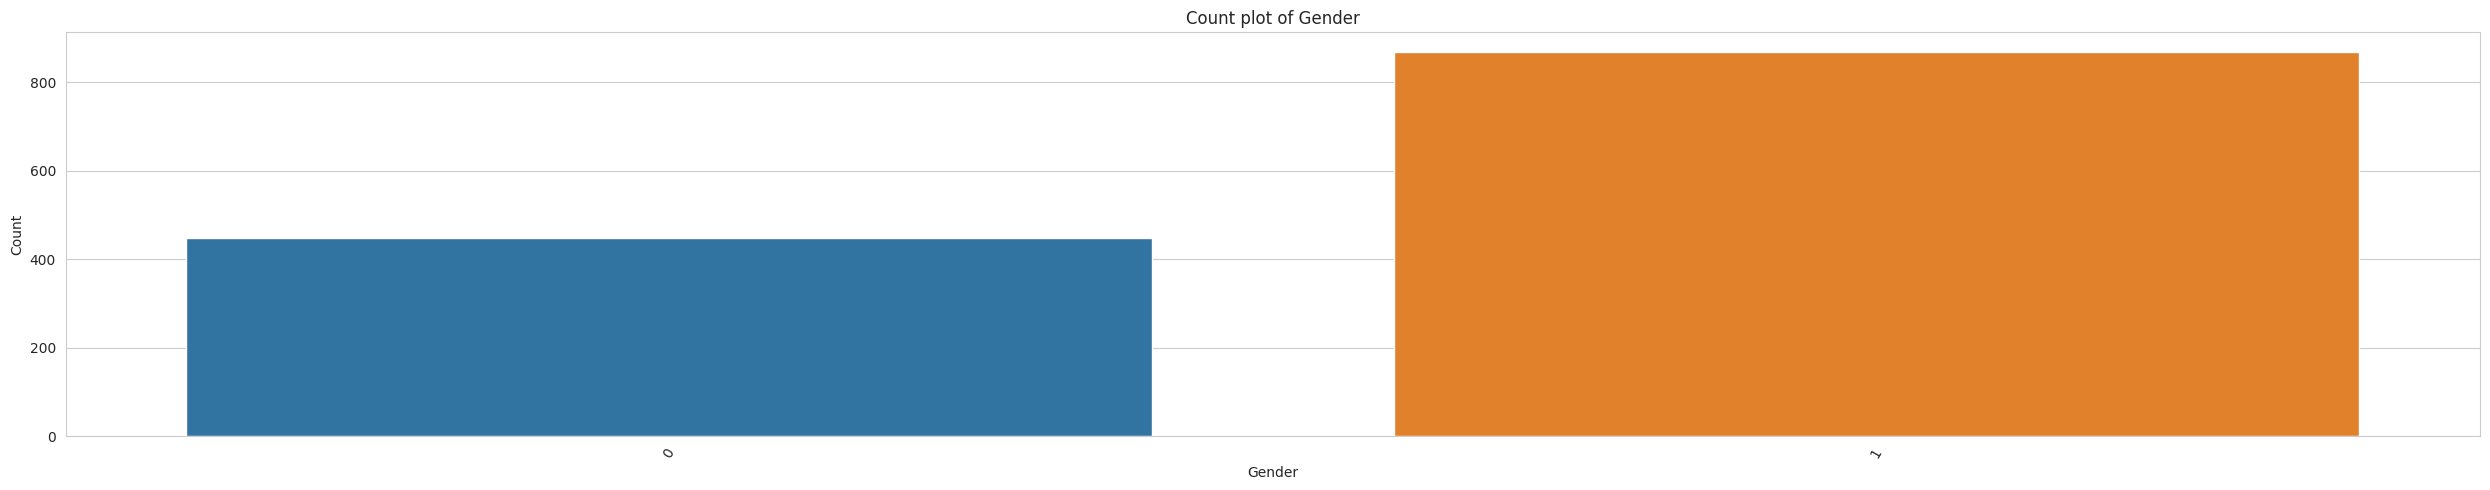

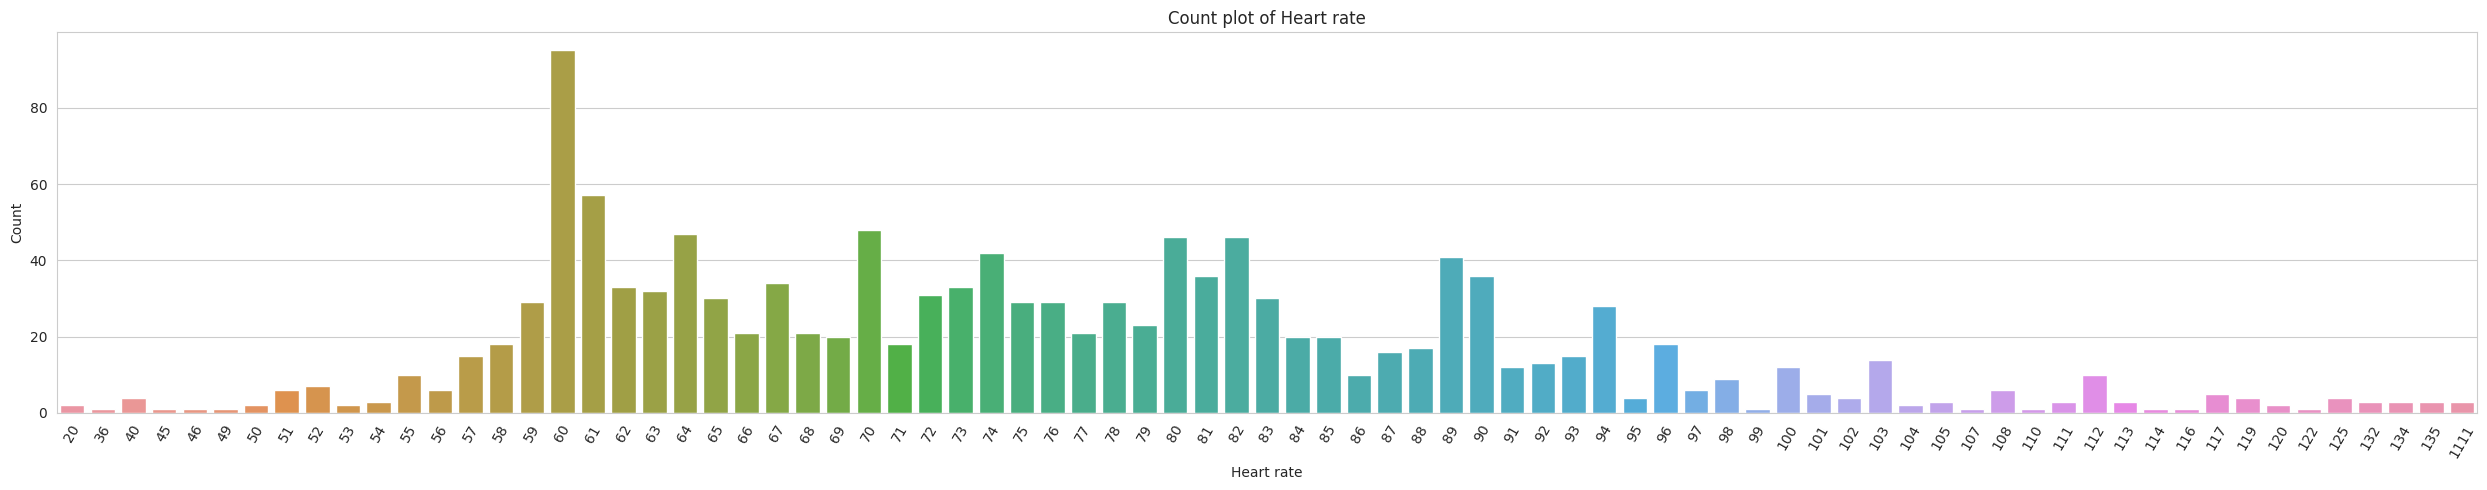

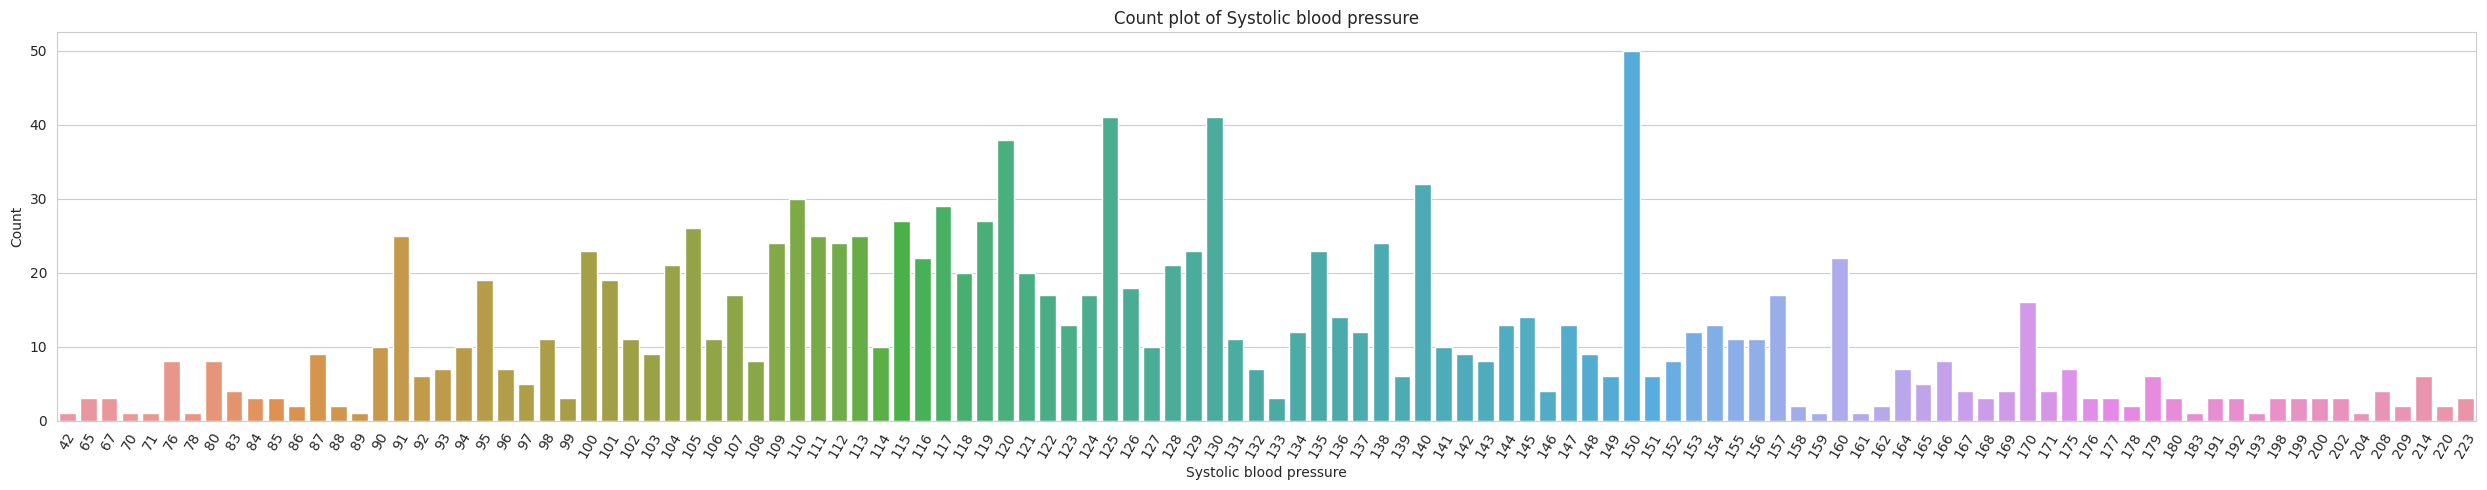

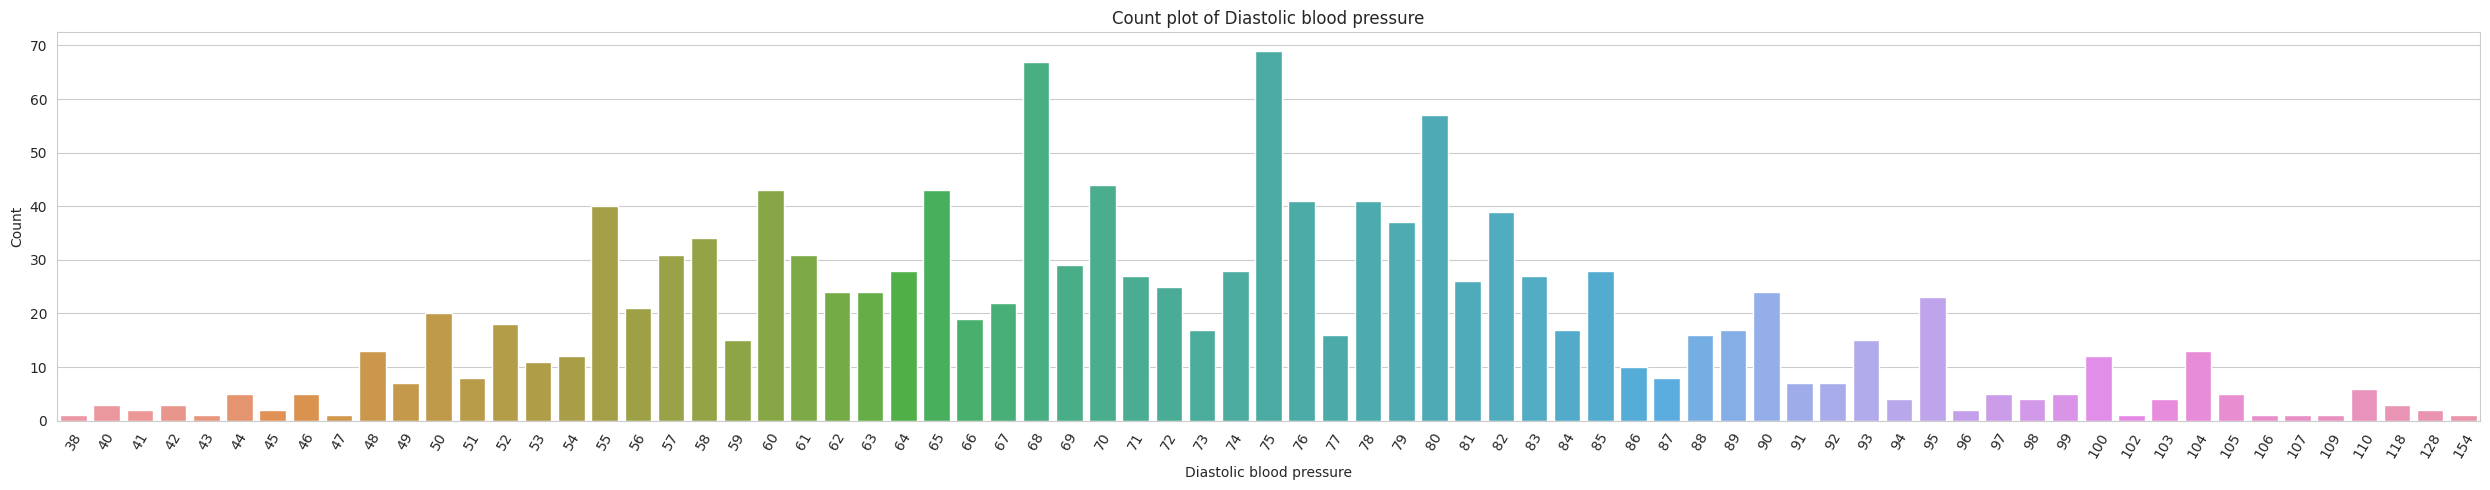

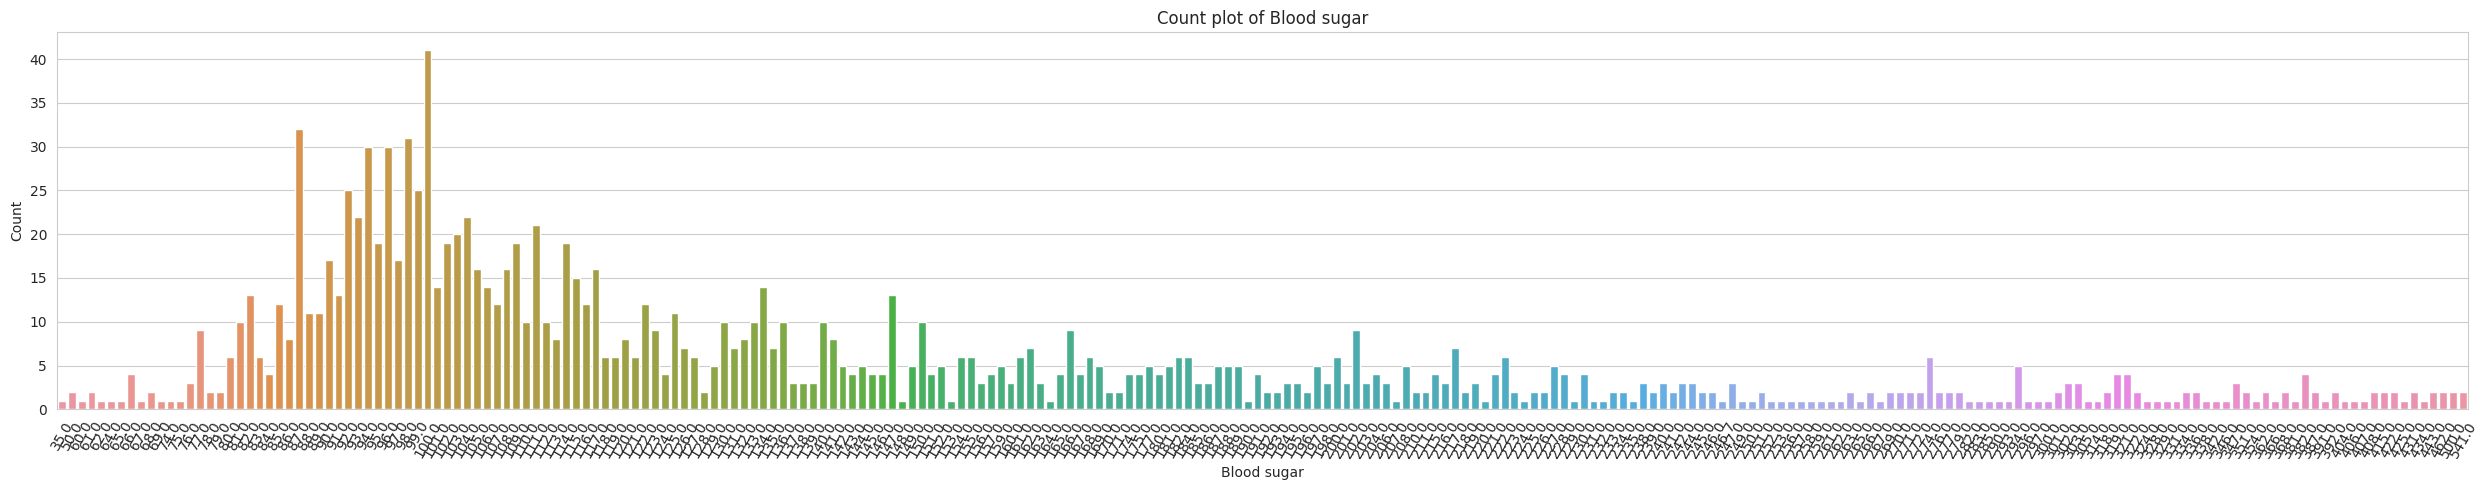

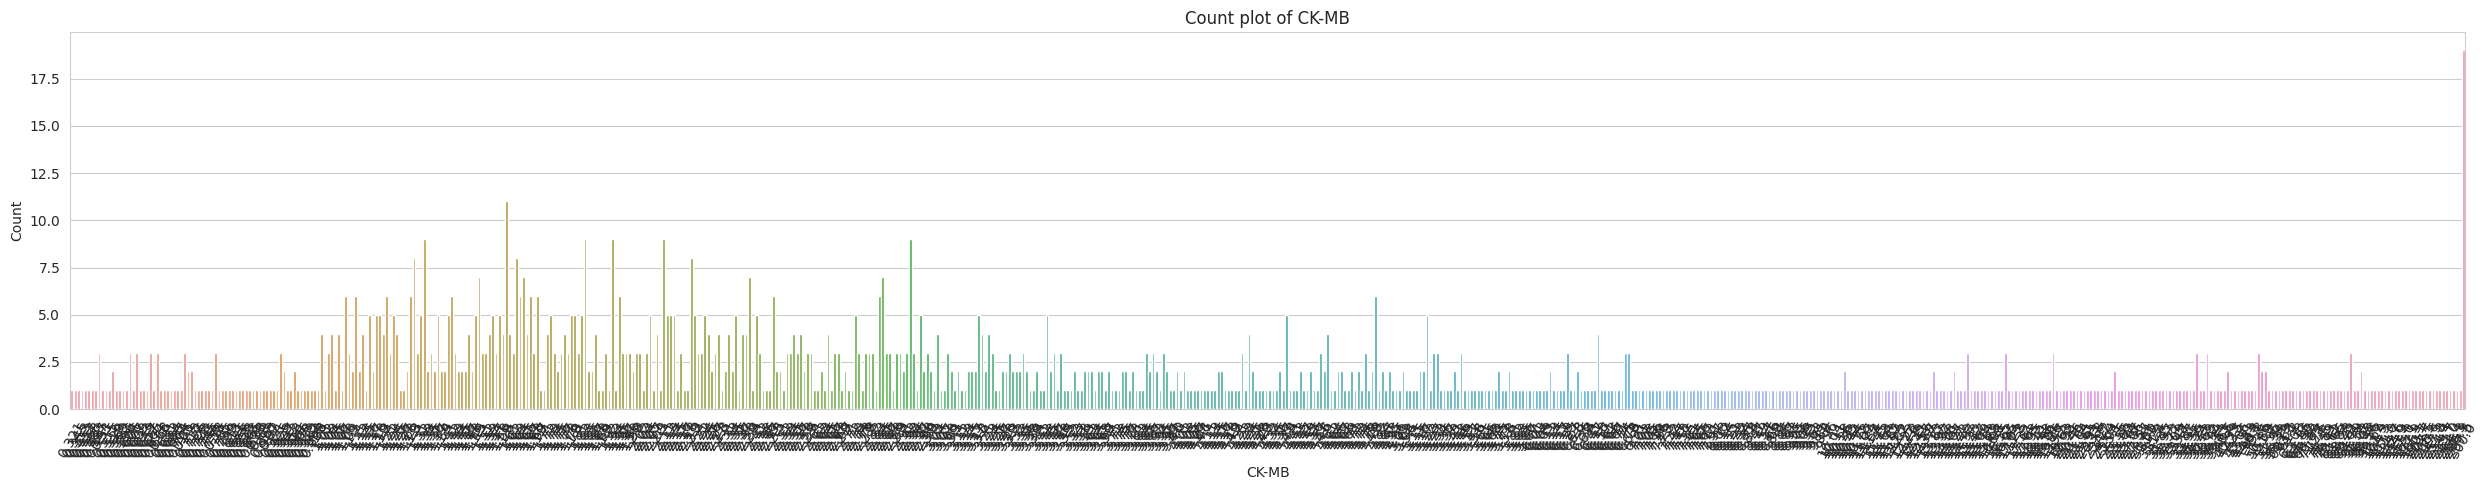

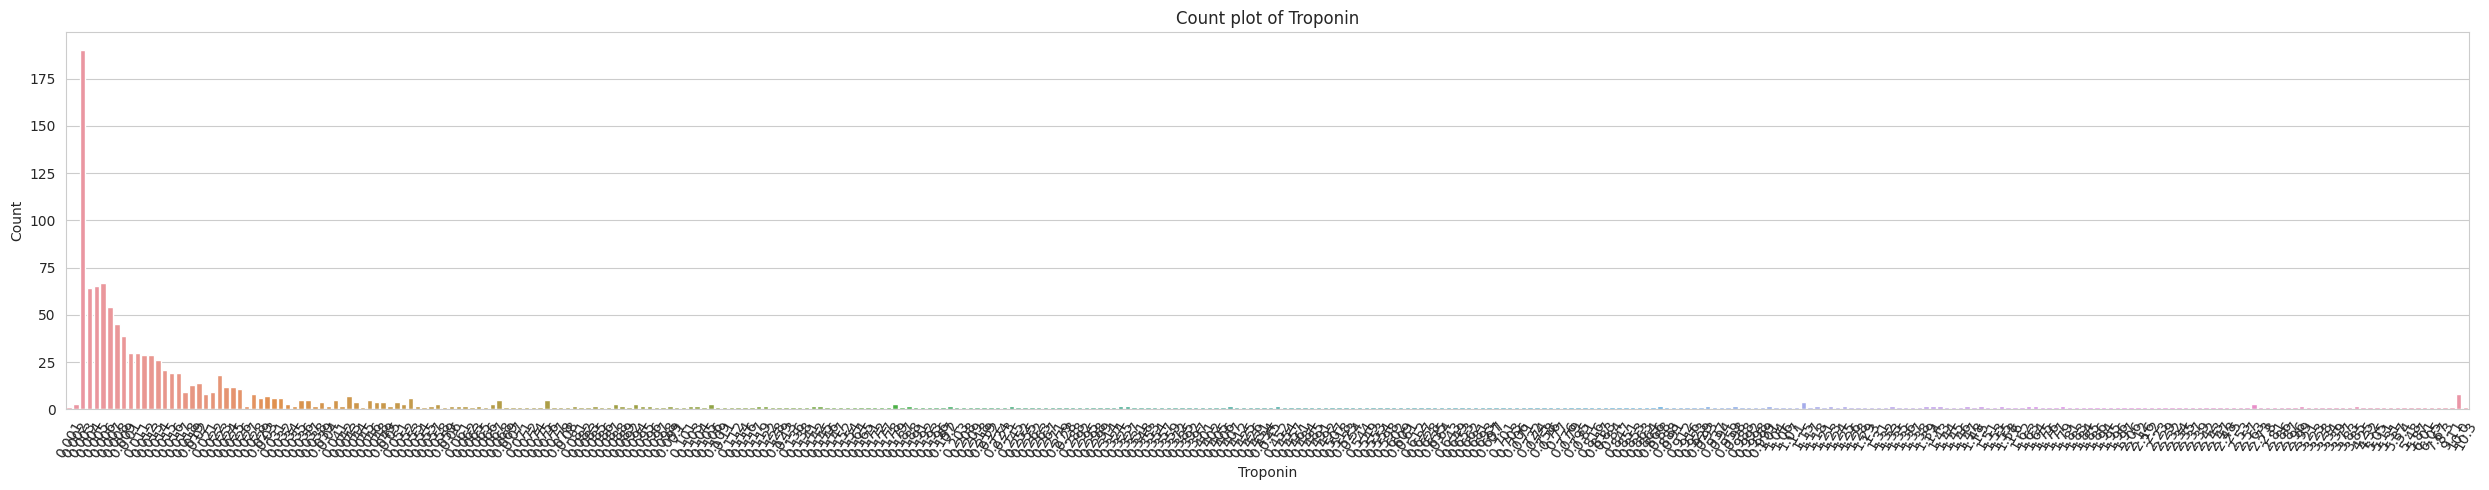

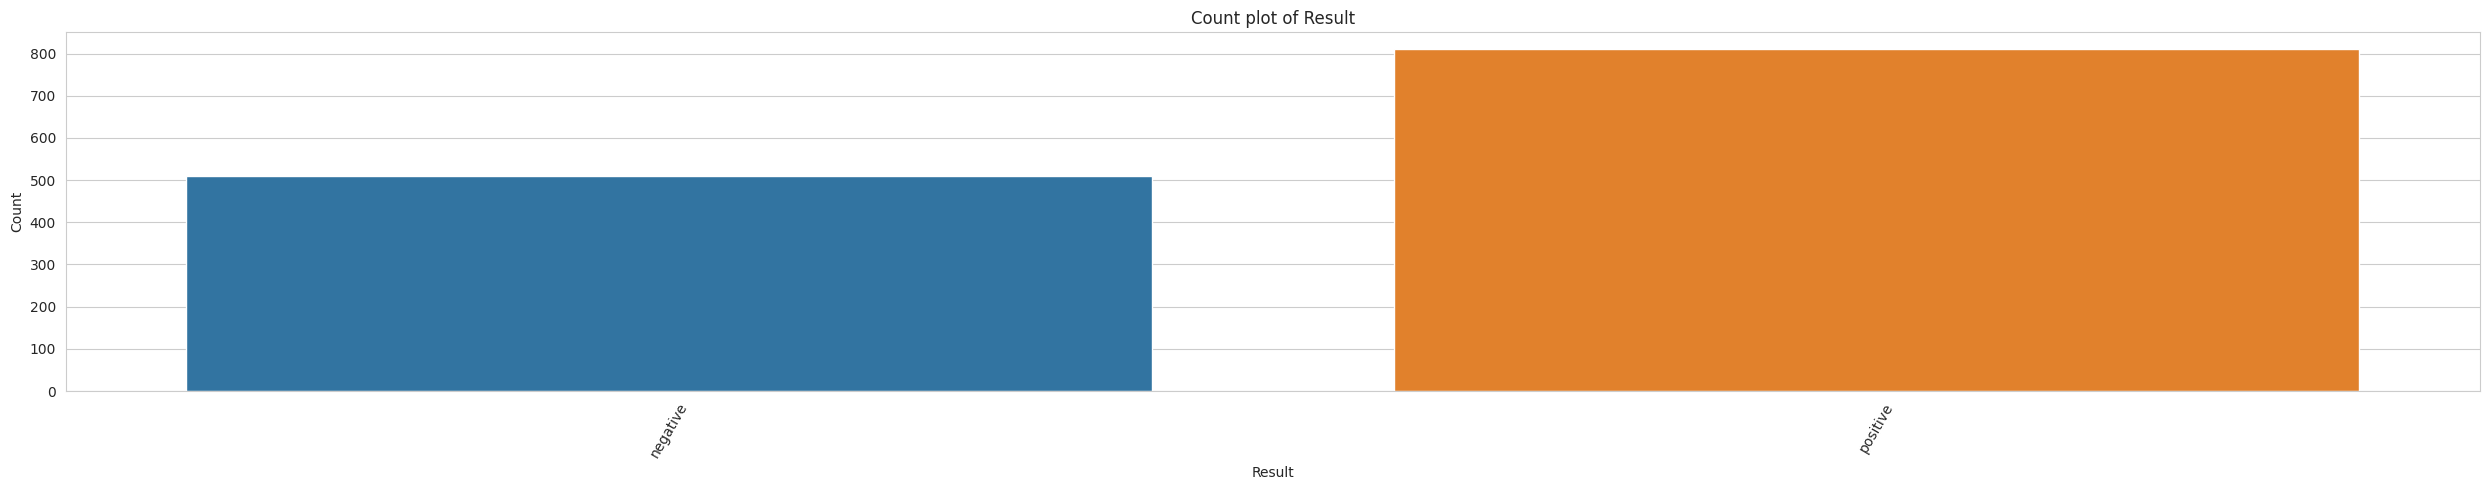

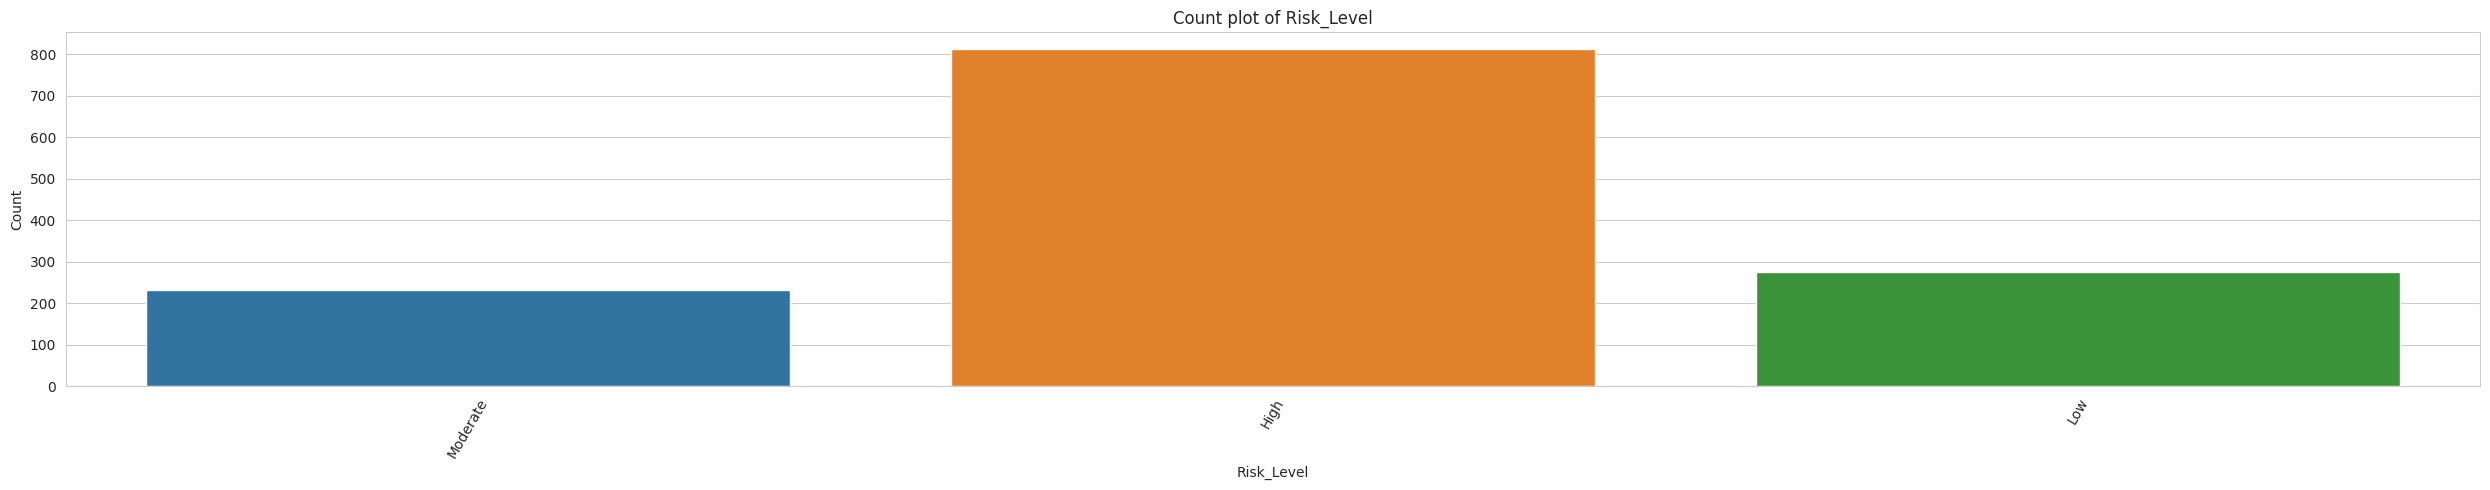

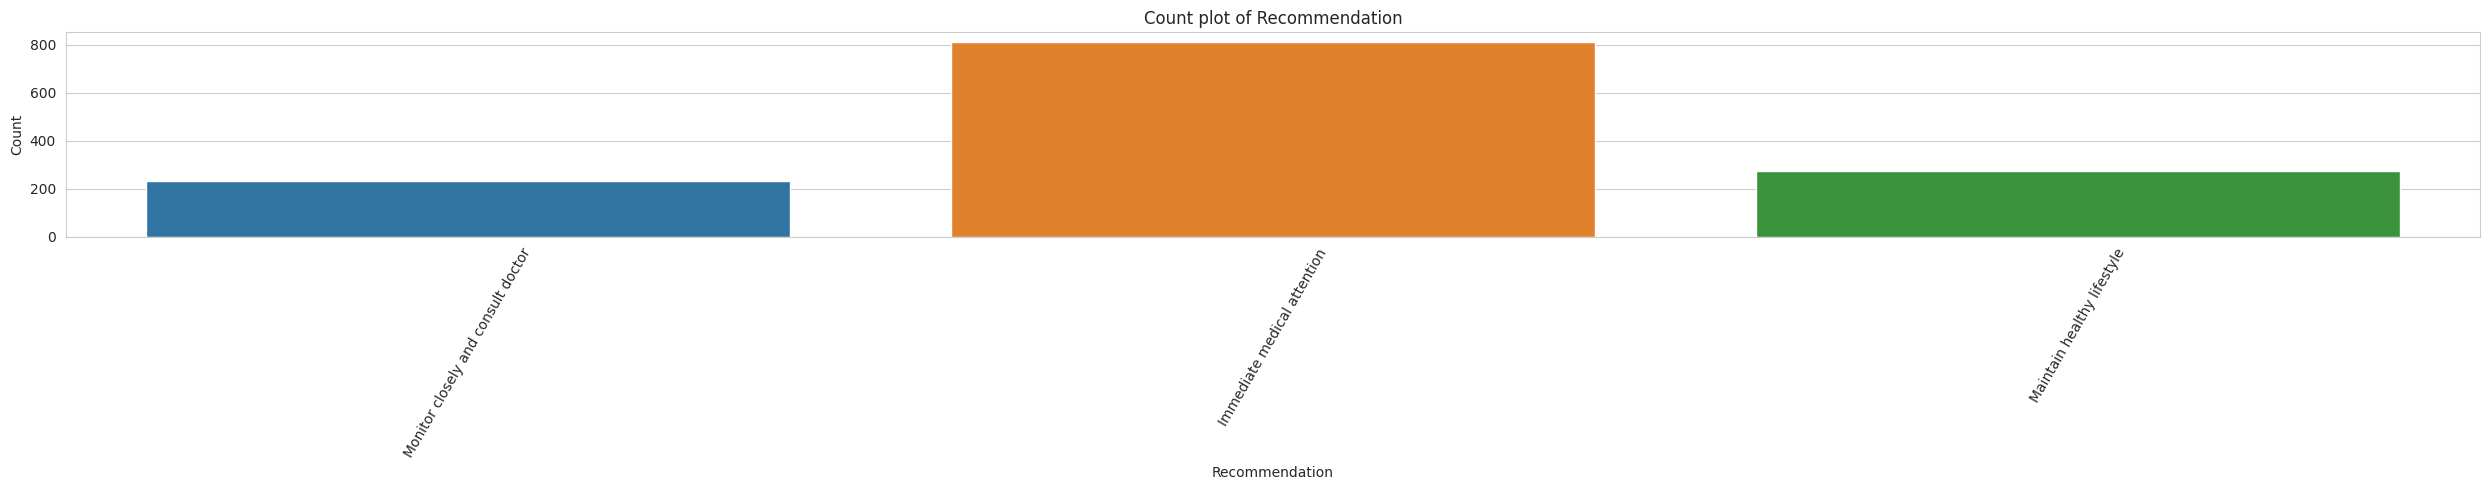

In [11]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(25,5))
        sns.countplot(x= features,data = df)
        plt.title(f'Count plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

# Correlation matrix

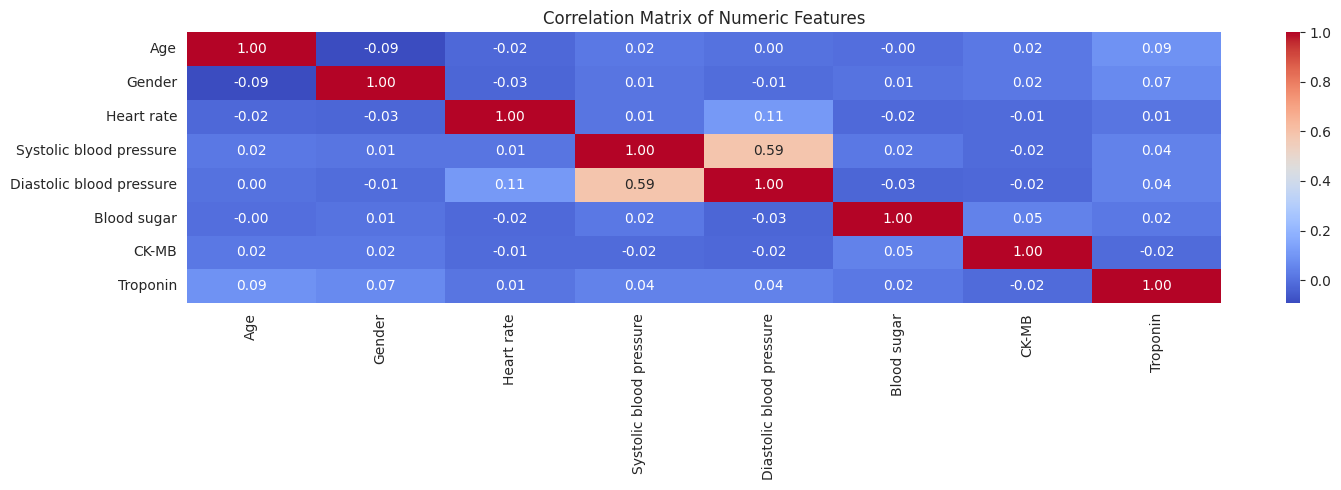

In [12]:
numeric_df = df.select_dtypes(include = np.number)
if numeric_df.shape[1] >=4:
    plt.figure(figsize=(15,5))
    correlation_matrix= numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# Scatter plot between Systolic blood pressure,Diastolic blood pressure.

<Axes: xlabel='Systolic blood pressure', ylabel='Diastolic blood pressure'>

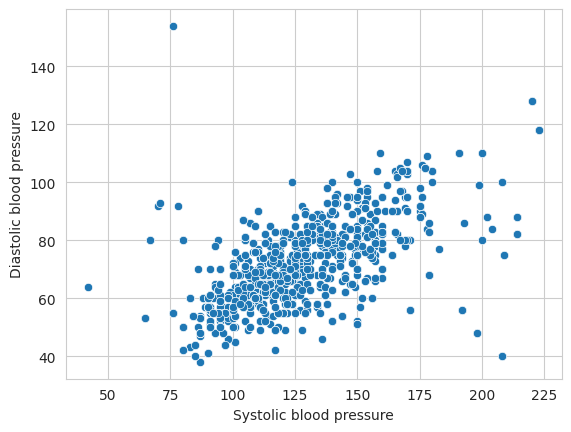

In [13]:
sns.scatterplot(x = df['Systolic blood pressure'],y = df['Diastolic blood pressure'])


# Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result', 'Risk_Level', 'Recommendation'],
      dtype='object')

In [16]:
lab_cols = ['Result', 'Risk_Level', 'Recommendation']

In [17]:
le = LabelEncoder()

In [18]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [19]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,0,2,2
1,20,1,94,98,46,296.0,6.75,1.060,1,0,0
2,56,1,64,160,77,270.0,1.99,0.003,0,2,2
3,66,1,70,120,55,270.0,13.87,0.122,1,0,0
4,54,1,64,112,65,300.0,1.08,0.003,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0,2,2
1315,66,1,84,125,55,149.0,1.33,0.172,1,0,0
1316,45,1,85,168,104,96.0,1.24,4.250,1,0,0
1317,54,1,58,117,68,443.0,5.80,0.359,1,0,0


# Correlation after feature Engineering

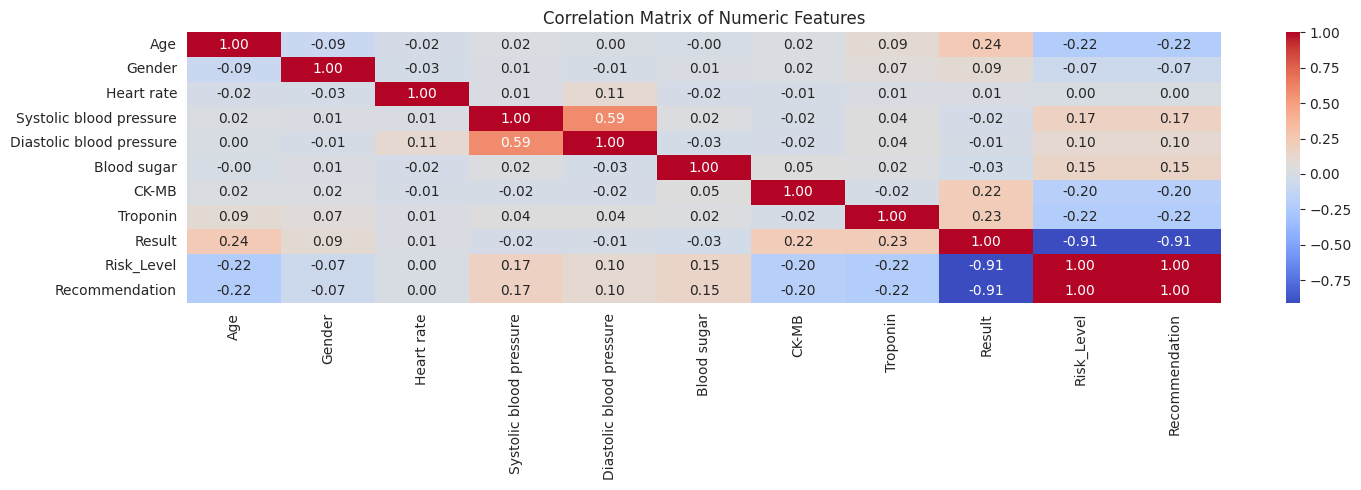

In [20]:
numeric_df1 = df.select_dtypes(include = [np.number])
if numeric_df1.shape[1]>=4:
    plt.figure(figsize=(15,5))
    correlation_matrix1 = numeric_df1.corr()
    sns.heatmap(correlation_matrix1,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

# Modlel section

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [22]:
X = df.drop(columns=['Result'])
y = df['Result']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Scaleing

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
X_test_scaled

array([[ 1.41068695,  0.71314194, -0.09180772, ..., -0.29905319,
        -0.715973  , -0.715973  ],
       [-1.93528616, -1.40224539, -0.16816952, ..., -0.3148824 ,
         0.58759163,  0.58759163],
       [-0.48051524,  0.71314194, -0.24453133, ..., -0.31262108,
         0.58759163,  0.58759163],
       ...,
       [ 0.82877858, -1.40224539,  0.04564353, ..., -0.25684198,
        -0.715973  , -0.715973  ],
       [ 0.61056294,  0.71314194, -0.16816952, ..., -0.30885223,
        -0.715973  , -0.715973  ],
       [-0.11682251,  0.71314194,  0.0609159 , ..., -0.29829942,
        -0.715973  , -0.715973  ]])

In [27]:
# Define models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced'),
    "RandomForest Classifier": RandomForestClassifier(class_weight='balanced',max_depth= 20, min_samples_split= 2, n_estimators= 100),
    "GradientBoosting Classifier": GradientBoostingClassifier(learning_rate =0.005,max_depth=10),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "SVC": SVC(class_weight='balanced',C= 100, gamma= 'auto', kernel= 'rbf'),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(),
    "XGB Classifier": XGBClassifier(scale_pos_weight=3654/1045),  # XGBoost uses scale_pos_weight
    "LGBM Classifier": LGBMClassifier(class_weight='balanced')
}



In [28]:
def report(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {"Model": model.__class__.__name__, "MAE": mae, "MSE": mse, "R² Score": r2}


results = []

# Train & evaluate models
for name, model in models.items():
    results.append(report(model, X_train_scaled, y_train, X_test_scaled, y_test))

# Convert to DataFrame for tabular display
results_df = pd.DataFrame(results)

print('-------------------------------------------------------------------------------------------------------------------------------------------------')
print(results_df)
print('--------------------------------------------------------------------------------------------------------------------------------------------------')


[LightGBM] [Info] Number of positive: 647, number of negative: 408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 1055, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# Model performance plot

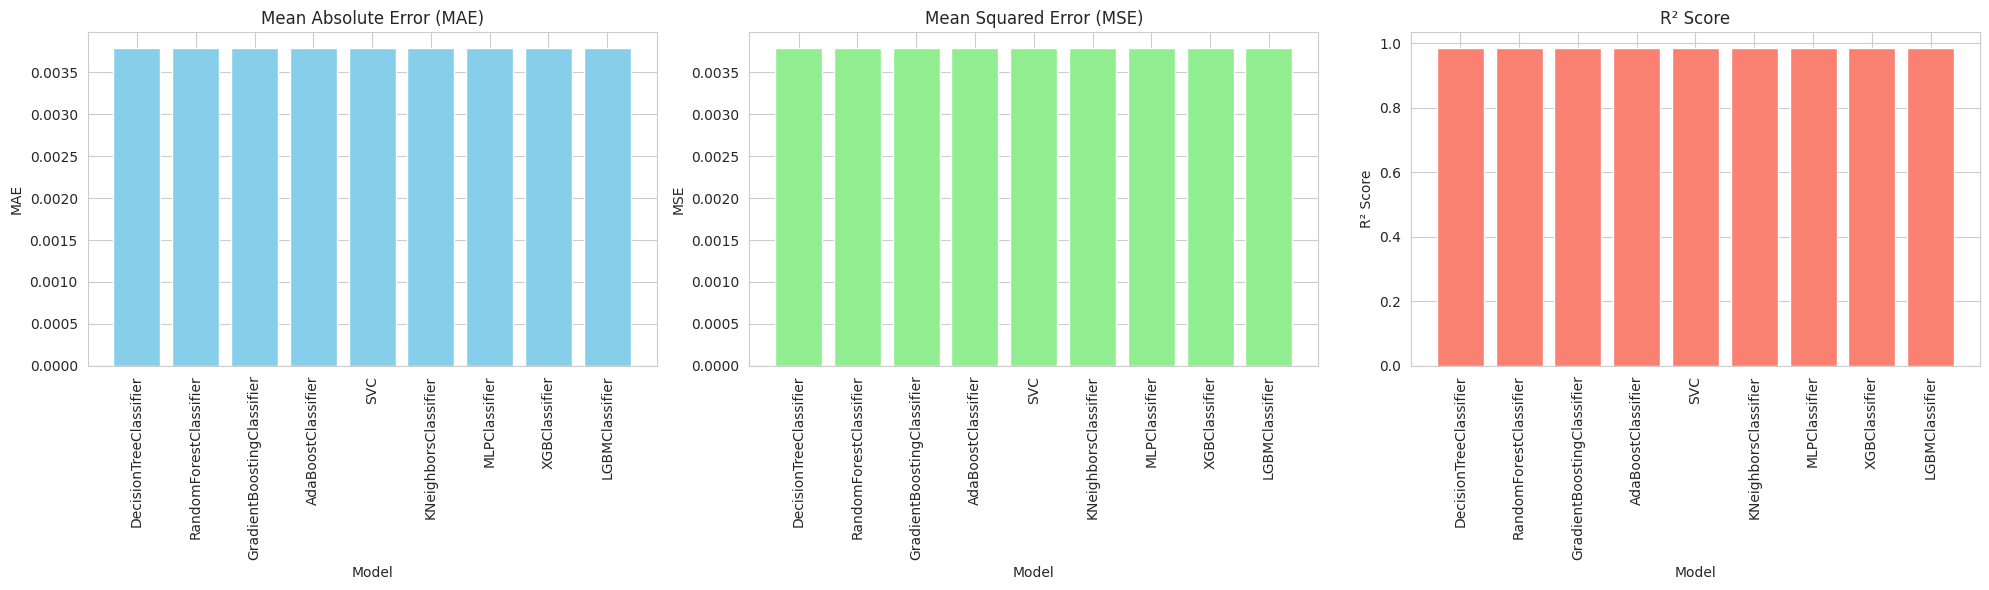

In [29]:
# Assuming the previous code for report function and collecting results is already there

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the performance metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# plt.xticks(rotation=90)

# MAE plot
axes[0].bar(results_df['Model'], results_df['MAE'], color='skyblue')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x',rotation=90)

# MSE plot
axes[1].bar(results_df['Model'], results_df['MSE'], color='lightgreen')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('MSE')
axes[1].tick_params(axis='x',rotation=90)

# R² plot
axes[2].bar(results_df['Model'], results_df['R² Score'], color='salmon')
axes[2].set_title('R² Score')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('R² Score')
axes[2].tick_params(axis='x',rotation=90)

plt.tight_layout()
# plt.xticks(rotation=90)
plt.show()


# Conclusion:
> After applying alomost all models giving ~0.99 R-Score
>
> May there is some overfit issue need to solve.